In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Now we need to read in the data
df= pd.read_csv("C:\\Users\\Msunwa\\Documents\\Projects\\Python Projects\\movies.csv")

In [31]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100


In [ ]:
#Checking for null values Method 1

df.isnull().sum()

In [ ]:
#Method 2 Checking for missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

In [ ]:
df.dtypes

In [4]:
#Filling in missing values with 0 for numerical data
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)
df['votes'] = df['votes'].fillna(0)
df['score'] = df['score'].fillna(0)
df['runtime'] = df['runtime'].fillna(0)
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['score'] = df['score'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [ ]:
df.sort_values(by = ['gross'],inplace = False, ascending=False)

In [ ]:
df.drop_duplicates()

<Axes: xlabel='gross', ylabel='budget'>

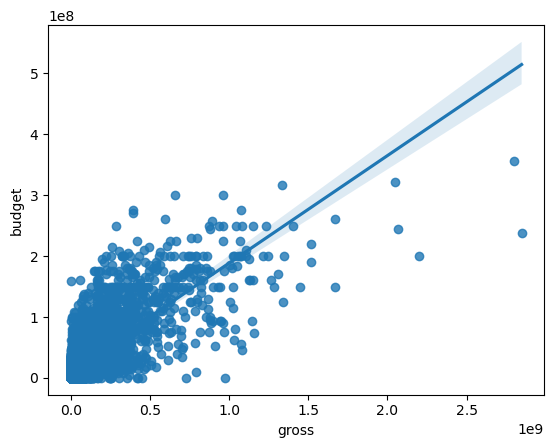

In [37]:
sns.regplot(x="gross", y="budget", data=df)

<Axes: xlabel='score', ylabel='gross'>

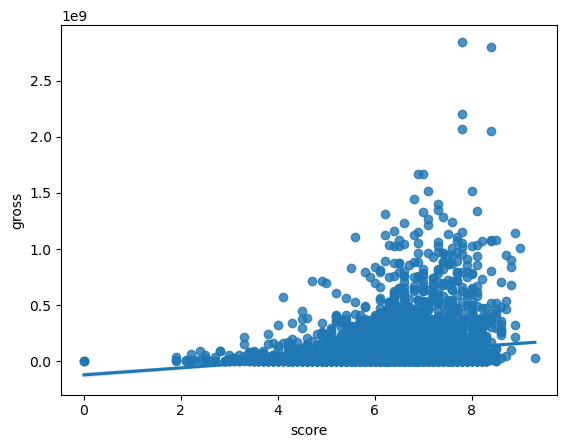

In [38]:
sns.regplot(x="score", y="gross", data=df)

In [5]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr(method='pearson')

In [8]:
numeric_df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.091429,0.222427,0.309212,0.261900,0.116358
score,0.091429,1.000000,0.391952,0.053473,0.177451,0.379436
votes,0.222427,0.391952,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.053473,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.177451,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.379436,0.306984,0.268372,0.244339,1.000000


In [7]:
numeric_df.corr(method = 'kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.072389,0.330410,0.209304,0.216595,0.096390
score,0.072389,1.000000,0.319009,-0.003361,0.100147,0.299543
votes,0.330410,0.319009,1.000000,0.439883,0.560449,0.197697
budget,0.209304,-0.003361,0.439883,1.000000,0.541956,0.176184
gross,0.216595,0.100147,0.560449,0.541956,1.000000,0.177429
runtime,0.096390,0.299543,0.197697,0.176184,0.177429,1.000000


In [9]:
numeric_df.corr(method = 'spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.095526,0.468107,0.291152,0.314681,0.141805
score,0.095526,1.000000,0.412957,-0.004378,0.132230,0.383701
votes,0.468107,0.412957,1.000000,0.604693,0.752550,0.289359
budget,0.291152,-0.004378,0.604693,1.000000,0.716816,0.246941
gross,0.314681,0.132230,0.752550,0.716816,1.000000,0.257478
runtime,0.141805,0.383701,0.289359,0.246941,0.257478,1.000000


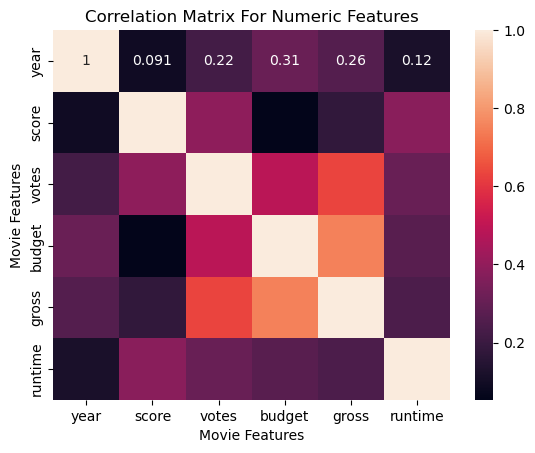

In [15]:
correlation_Plot = numeric_df.corr()
sns.heatmap(correlation_Plot, annot = True)
plt.title('Correlation Matrix For Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [19]:
Correlation_array= df.apply(lambda x: x.factorize()[0]).corr()
corr_pairs = Correlation_array.unstack()

In [20]:
print(corr_pairs)

name     name        1.000000
         rating      0.143938
         genre       0.036367
         year        0.965761
         released    0.959015
                       ...   
runtime  country     0.122260
         budget      0.117302
         gross       0.039992
         company     0.005668
         runtime     1.000000
Length: 225, dtype: float64


In [23]:
sorted_pairs = corr_pairs.sort_values(kind = 'quick')
print(sorted_pairs)

company  budget    -0.087285
budget   company   -0.087285
rating   genre     -0.086723
genre    rating    -0.086723
country  score     -0.086424
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [24]:
strong_pairs= sorted_pairs[abs(sorted_pairs)>0.5]
print(strong_pairs)

star     company     0.527116
company  star        0.527116
         writer      0.546151
writer   company     0.546151
company  director    0.552258
                       ...   
year     year        1.000000
genre    genre       1.000000
rating   rating      1.000000
company  company     1.000000
runtime  runtime     1.000000
Length: 71, dtype: float64


In [26]:
CompanyGrossSum =df.groupby('company')[['gross']].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64')
CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [27]:
df.groupby(['company','year'])[['gross']].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926
"""Weathering With You"" Film Partners",2019,193457467
.406 Production,1996,10580
1+2 Seisaku Iinkai,2000,1196218
10 West Studios,2010,814906
...,...,...
i am OTHER,2015,17986781
i5 Films,2001,10031529
iDeal Partners Film Fund,2013,506303


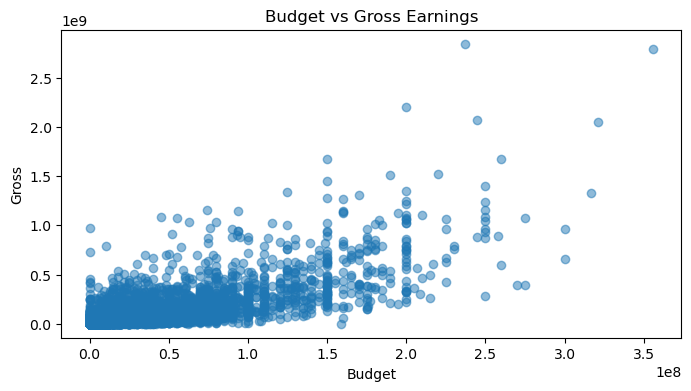

In [29]:
plt.figure(figsize = (8, 4))
plt.scatter(df['budget'], df['gross'], alpha =0.5)
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget vs Gross Earnings')
plt.show()

In [ ]:
sns.swarmplot(x='rating', y='gross', data = df, 'mode.use_inf_as_na', True)
plt.show()

In [ ]:
sns.stripplot(x='rating', y= 'gross', data = df)
plt.show()